In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 


In [4]:
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

There are two types of data in this dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<Axes: >

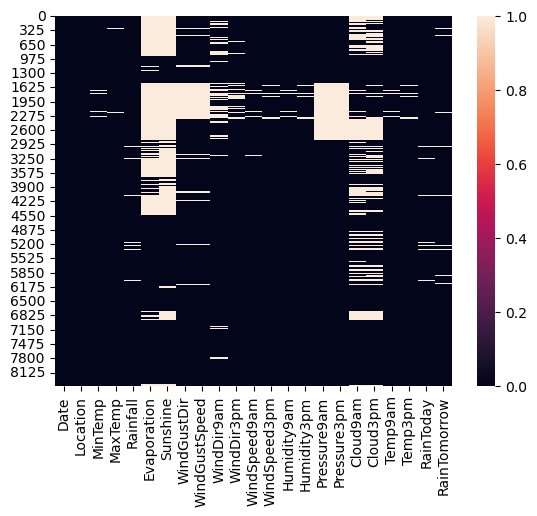

In [9]:
sns.heatmap(df.isnull())

we can clearly visualize that there are lot of missing values in this dataset

In [10]:
#checking for categorical columns
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print('Categorical columns:',cat_cols)

Categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
#checking for numerical columns
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print('Numerical columns:',num_cols)

Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
df.duplicated().sum()

1663

In [13]:
df = df[~df.duplicated()]


In [14]:
df.duplicated().sum()

0

In [15]:
#checking for value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Date
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64


Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64


MinTemp
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: count, Length: 285, dtype: int64


MaxTemp
19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: count, Length: 331, dtype: int64


Rainfall
0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1

In [16]:
elements = df.select_dtypes(include=['object']).columns

print(elements)

for i in elements:
    df[i] = df[i].fillna(df[i].mode()[0])

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [17]:
ele = df.select_dtypes(include=['float']).columns

print(ele)

for i in ele:
    df[i] = df[i].fillna(df[i].mean())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: >

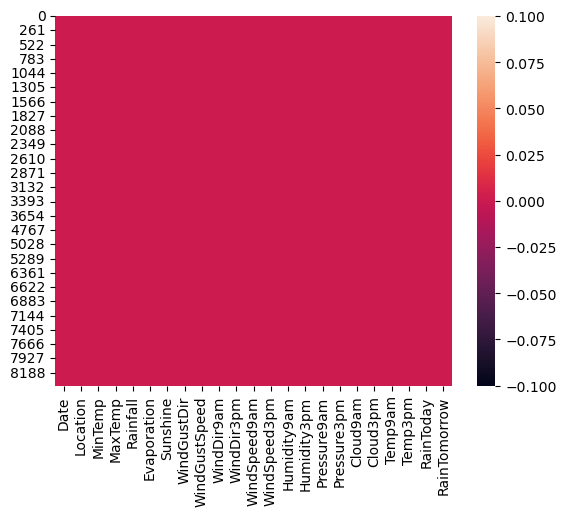

In [19]:
sns.heatmap(df.isnull())

In [20]:
# Extract the Day and Month from Date column.

df['Day']= df['Date'].str.split('-').str[2]
df['Month']= df['Date'].str.split('-').str[1]
df['Year'] = df['Date'].str.split('-').str[0]


In [21]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,...,1007.1,8.000000,4.320988,16.9,21.8,No,No,01,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,...,1007.8,4.336806,4.320988,17.2,24.3,No,No,02,12,2008


In [22]:
df['Month'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [23]:
df['Year'].unique()

array(['2008', '2009', '2010', '2011', '2013', '2014', '2015', '2016',
       '2017', '2012'], dtype=object)

In [24]:
#Converting the datatype for newly created features

df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [25]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


1.This gives the statistical summary of numerical columns.The summary of the dataset looks perfect since there is no negative or invalid values are present. 2.In this dataset count of all columns are same,which means there is no missing values are present. 3.The median(50%) is less than mean which means skewness is preset 4.By summarizing the data there is diff between 75% and max Which means outliers are present. I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it, where few have very low values in it, where few have very high values in the datset.

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64

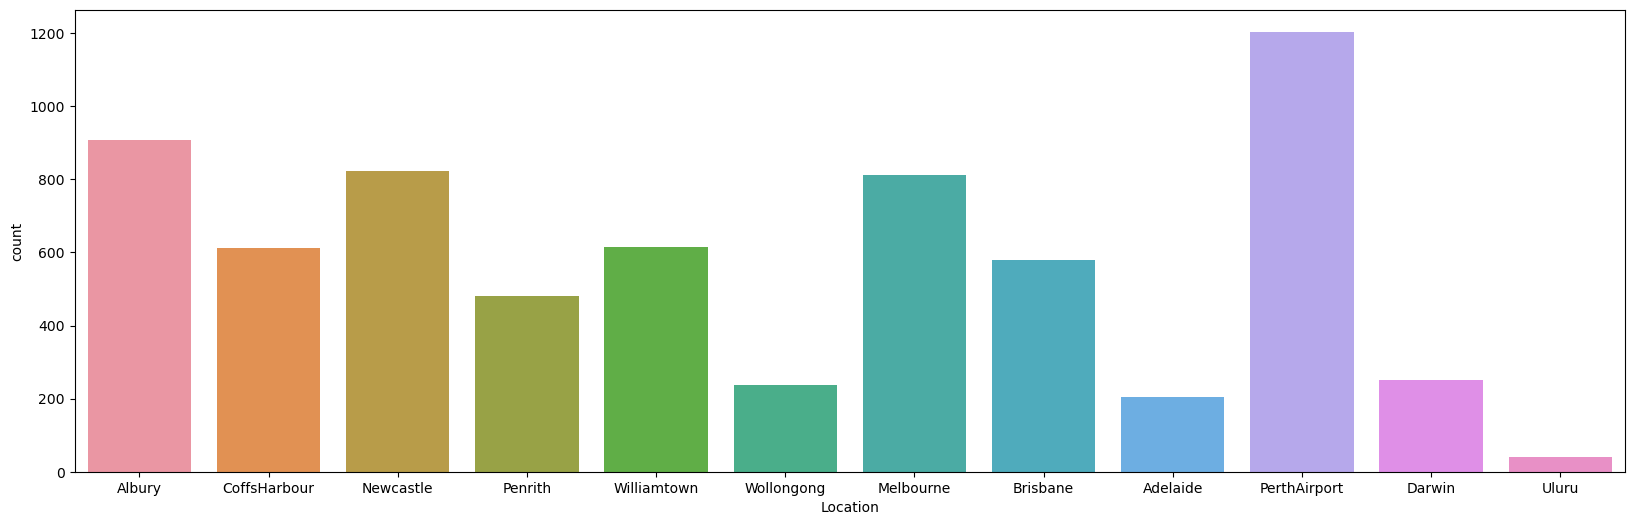

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x='Location',data=df)
df['Location'].value_counts()

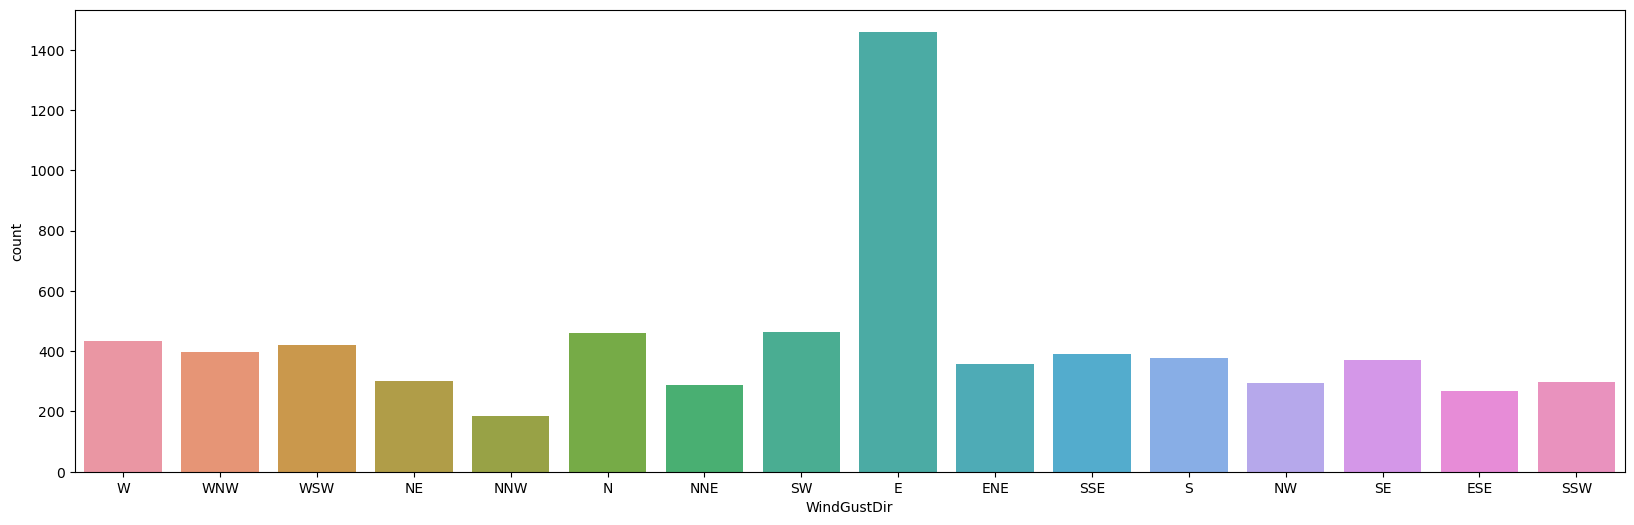

In [27]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x='WindGustDir',data=df)

WindDir9am
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: count, dtype: int64

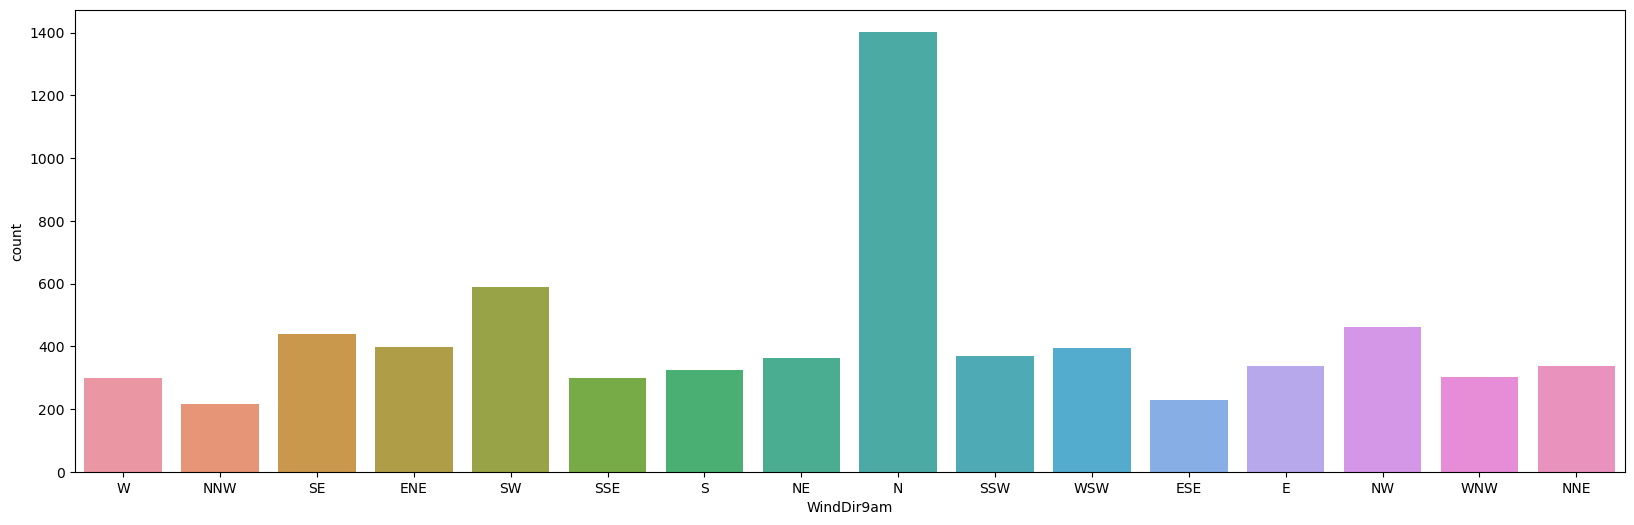

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(x='WindDir9am',data=df)
df['WindDir9am'].value_counts()

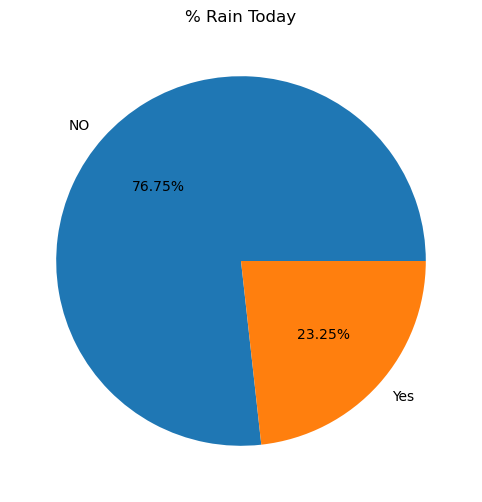

In [29]:
plt.figure(figsize=(10,6))
# plotting data on chart
plt.pie(df['RainToday'].value_counts()*100.0 /len(df),
        labels=['NO', 'Yes'],
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Rain Today')
plt.show()

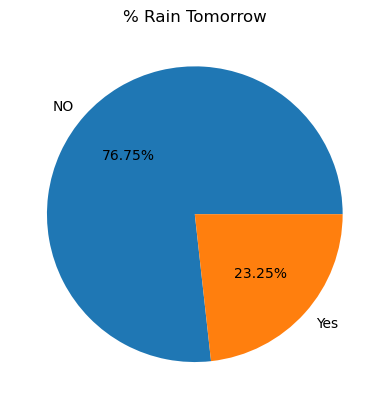

In [30]:
# plotting data on chart
plt.pie(df['RainTomorrow'].value_counts()*100.0 /len(df),
        labels=['NO', 'Yes'],
        autopct='%.2f%%')
plt.title('% Rain Tomorrow')
plt.show()


<Axes: ylabel='MinTemp'>

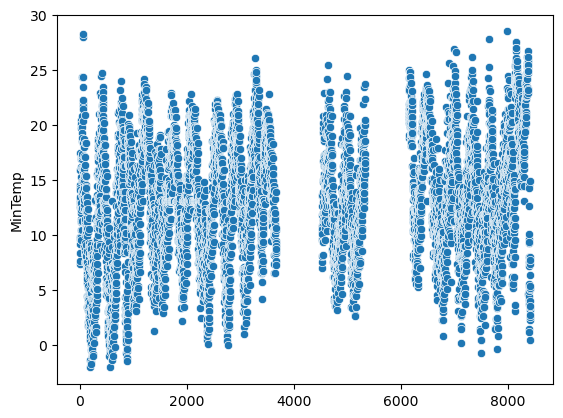

In [31]:
sns.scatterplot(df['MinTemp'])

<Axes: xlabel='MaxTemp', ylabel='Density'>

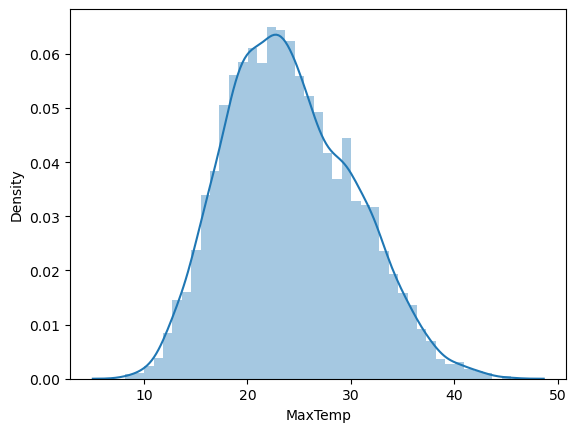

In [32]:
sns.distplot(df['MaxTemp'])

<Axes: xlabel='Rainfall', ylabel='Density'>

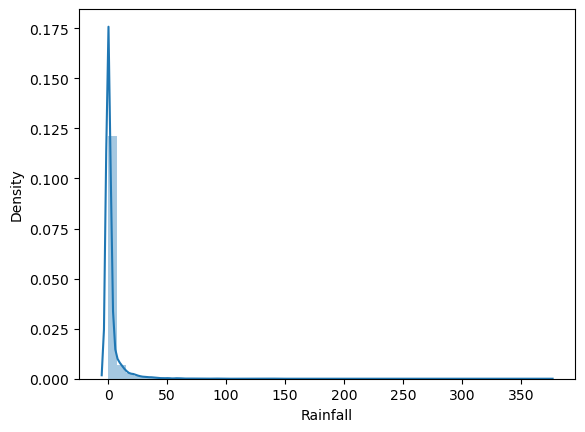

In [33]:
sns.distplot(df['Rainfall'])

It seems like majority of the values lies near to zero. Which seems like there is skewness in the data.



<Axes: xlabel='Sunshine', ylabel='Density'>

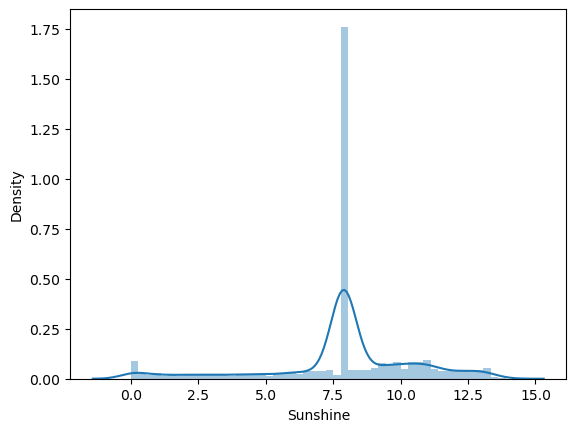

In [34]:
sns.distplot(df['Sunshine'])

<Axes: xlabel='WindSpeed9am', ylabel='Density'>

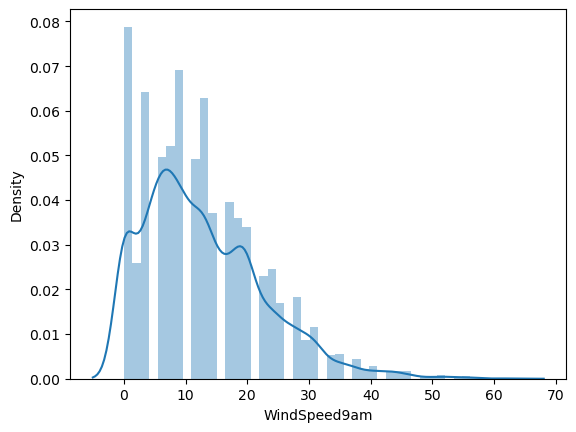

In [35]:
sns.distplot(df['WindSpeed9am'])

<Axes: xlabel='WindSpeed3pm', ylabel='Density'>

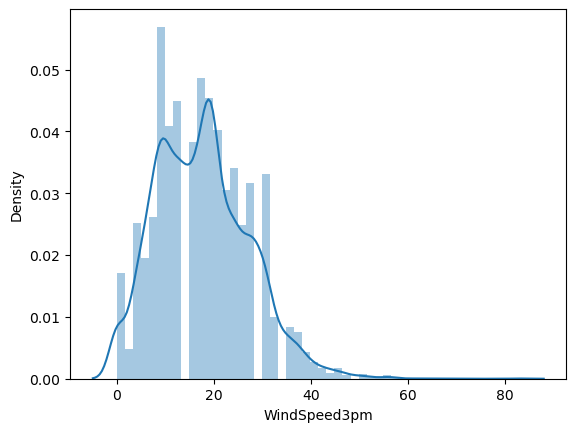

In [36]:
sns.distplot(df['WindSpeed3pm'])

<Axes: xlabel='Humidity9am', ylabel='Density'>

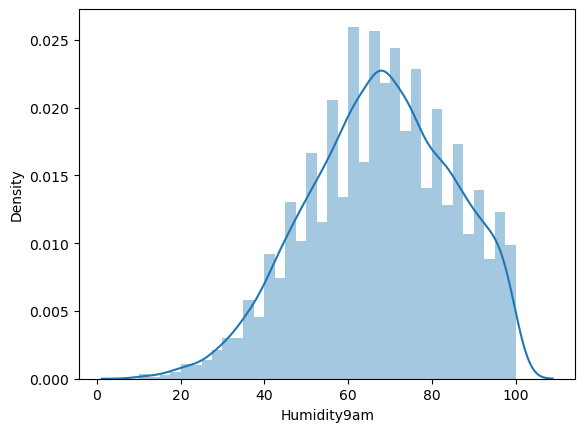

In [37]:

sns.distplot(df['Humidity9am'])

<Axes: xlabel='Humidity3pm', ylabel='Density'>

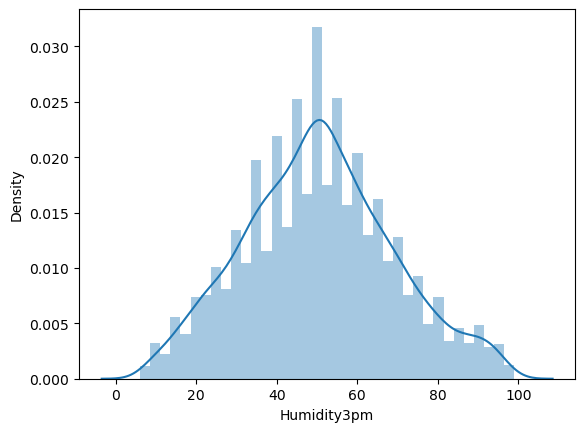

In [38]:
sns.distplot(df['Humidity3pm'])

<Axes: xlabel='Cloud9am', ylabel='Density'>

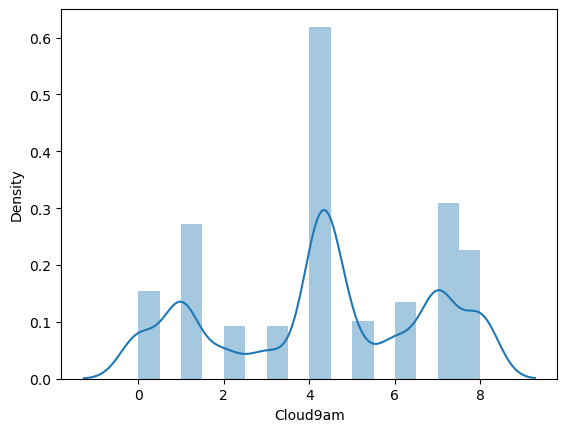

In [39]:
sns.distplot(df['Cloud9am'])

<Axes: xlabel='Cloud3pm', ylabel='Density'>

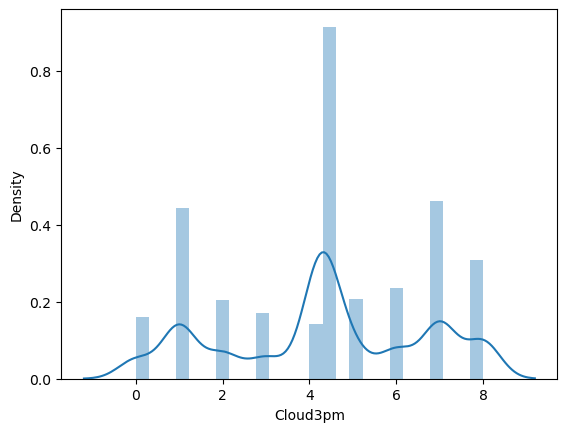

In [40]:
sns.distplot(df['Cloud3pm'])

<Axes: xlabel='Temp9am', ylabel='Density'>

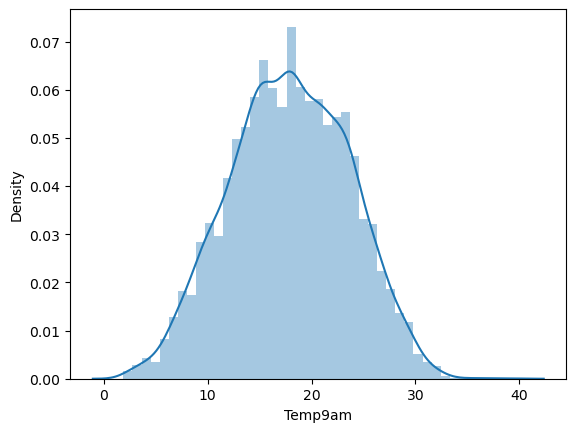

In [41]:
sns.distplot(df['Temp9am'])

<Axes: xlabel='Temp3pm', ylabel='Density'>

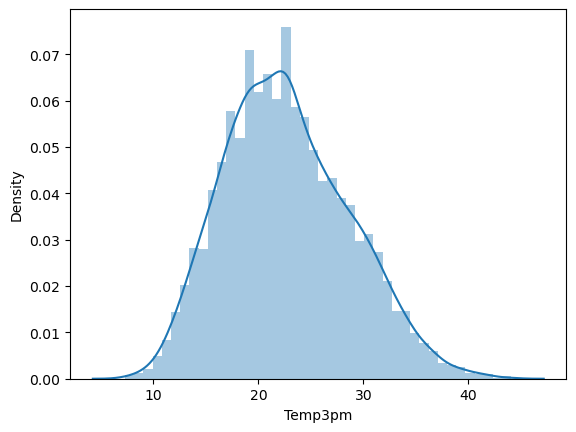

In [42]:
sns.distplot(df['Temp3pm'])

Both Temp 9am and 3pm has the same trend. We will create a new Column for Avg Temp by concating the two columns.



In [43]:
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2

df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2

df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2

df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2

df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2

In [44]:
df = df.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,WNW,No,No,1,12,2008,22.0,46.5,6.160494,19.35,1007.40
1,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,WSW,No,No,2,12,2008,13.0,34.5,4.328897,20.75,1009.20
2,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,WSW,No,No,3,12,2008,22.5,34.0,3.168403,22.10,1008.15
3,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,E,No,No,4,12,2008,10.0,30.5,4.328897,22.30,1015.20
4,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,NW,No,No,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


<Axes: xlabel='RainToday', ylabel='Avg_Temp'>

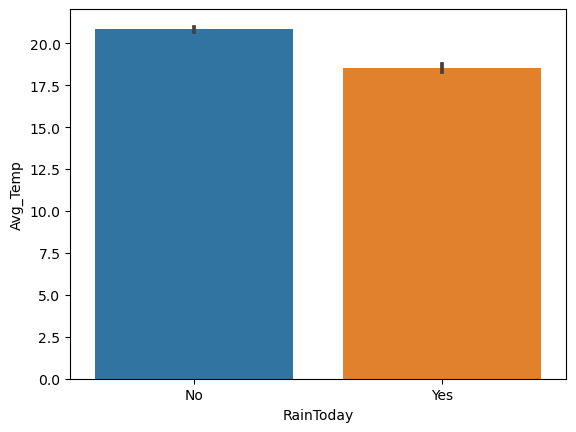

In [45]:
sns.barplot(y='Avg_Temp', x='RainToday', data = df)

<Axes: xlabel='RainToday', ylabel='Avg_Pressure'>

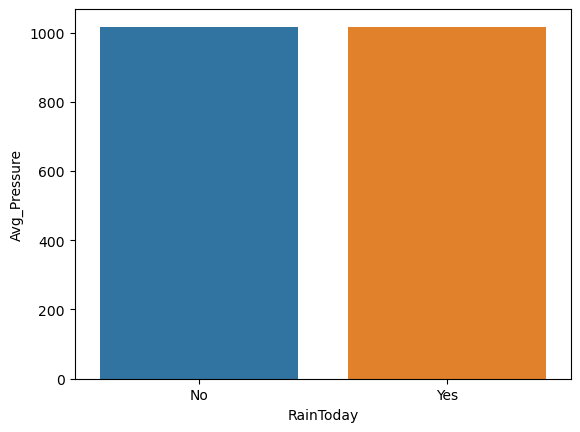

In [46]:
sns.barplot(y='Avg_Pressure', x='RainToday', data = df)

<Axes: xlabel='RainToday', ylabel='Avg_Cloud'>

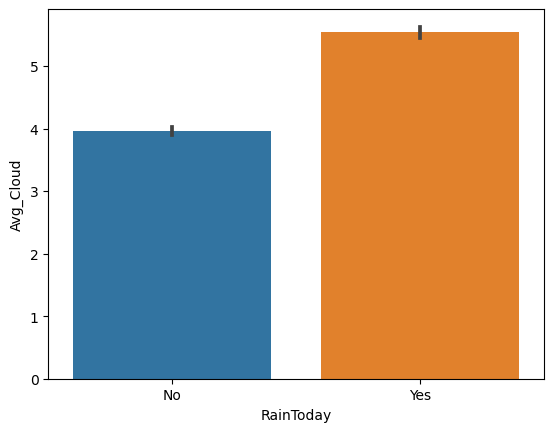

In [47]:
sns.barplot(y='Avg_Cloud', x='RainToday', data = df)

<Axes: xlabel='RainToday', ylabel='Avg_Humidity'>

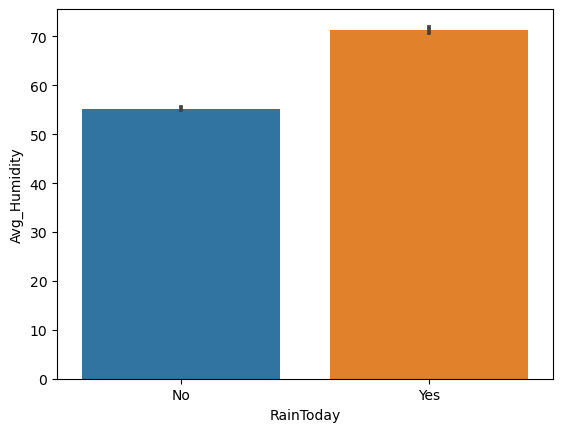

In [48]:
sns.barplot(y='Avg_Humidity', x='RainToday', data = df)

In [49]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
RainToday         object
RainTomorrow      object
Day                int32
Month              int32
Year               int32
Avg_WindSpeed    float64
Avg_Humidity     float64
Avg_Cloud        float64
Avg_Temp         float64
Avg_Pressure     float64
dtype: object

In [50]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

catg = df.select_dtypes(include=['object']).columns

catg

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [51]:
for i in catg:
    df[i] = enc.fit_transform(df[i])

In [52]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.6,5.302395,7.890896,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.160494,19.35,1007.40
1,1,7.4,25.1,0.0,5.302395,7.890896,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.328897,20.75,1009.20
2,1,12.9,25.7,0.0,5.302395,7.890896,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.168403,22.10,1008.15
3,1,9.2,28.0,0.0,5.302395,7.890896,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.328897,22.30,1015.20
4,1,17.5,32.3,1.0,5.302395,7.890896,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


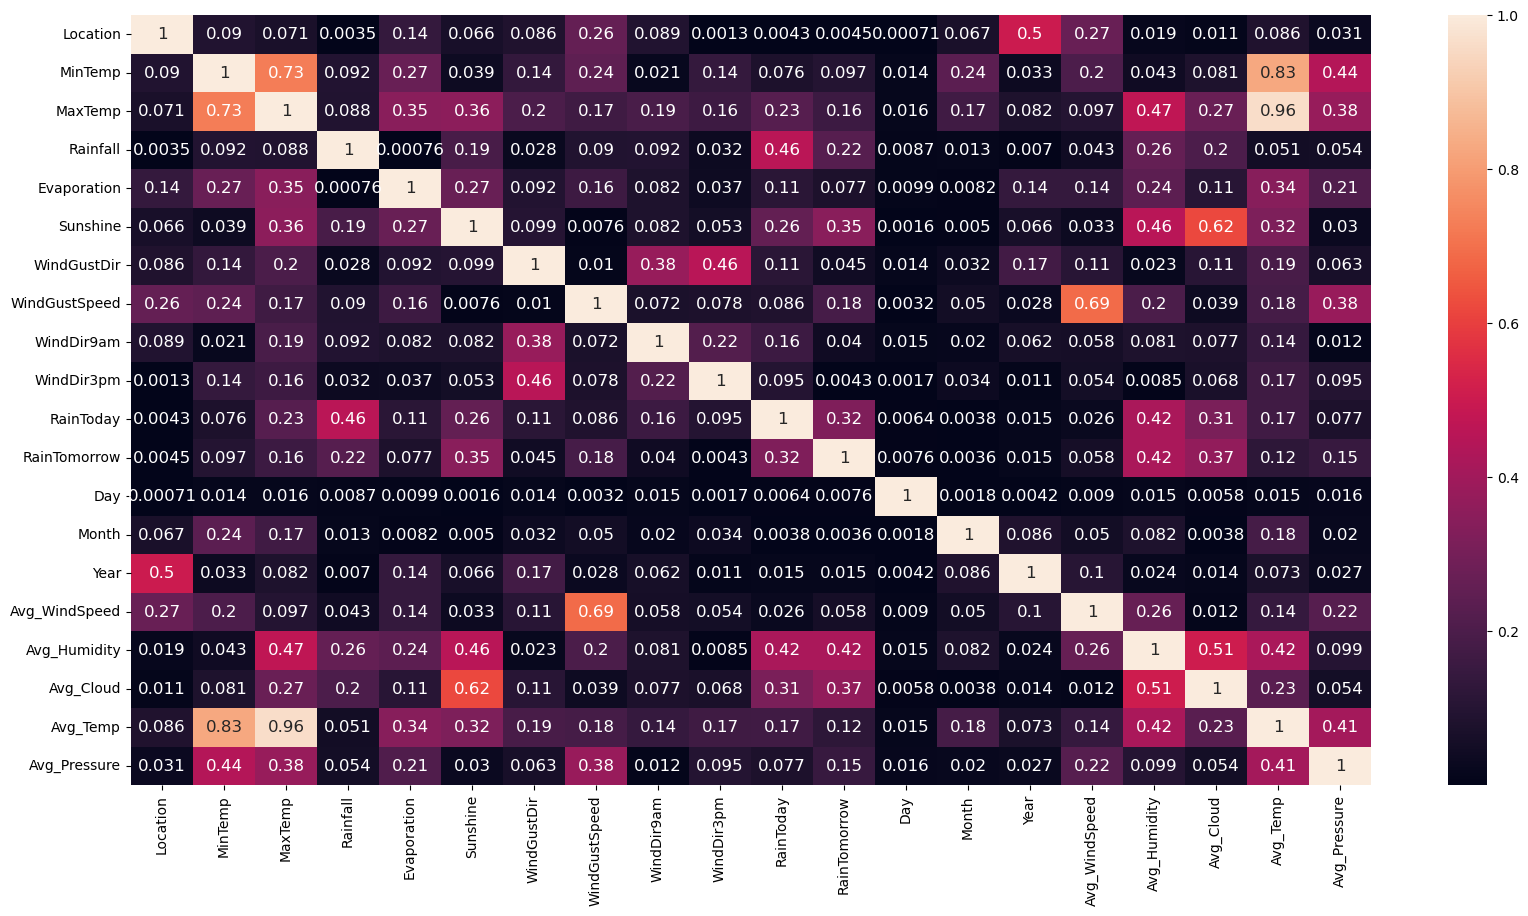

In [53]:
df_corr = df.corr().abs()

plt.figure(figsize = (20,10))
sns.heatmap(df_corr, annot = True, annot_kws={'size':12})
plt.show()

The highest value for correlation matrix is 0.96 between Avg_Temp and Max_Temp, which shows a strong correlation between the two columns. Apart from that there is no such column with high correlation value. We will also check for multicollinearity using VIF.

# Checking for outliers

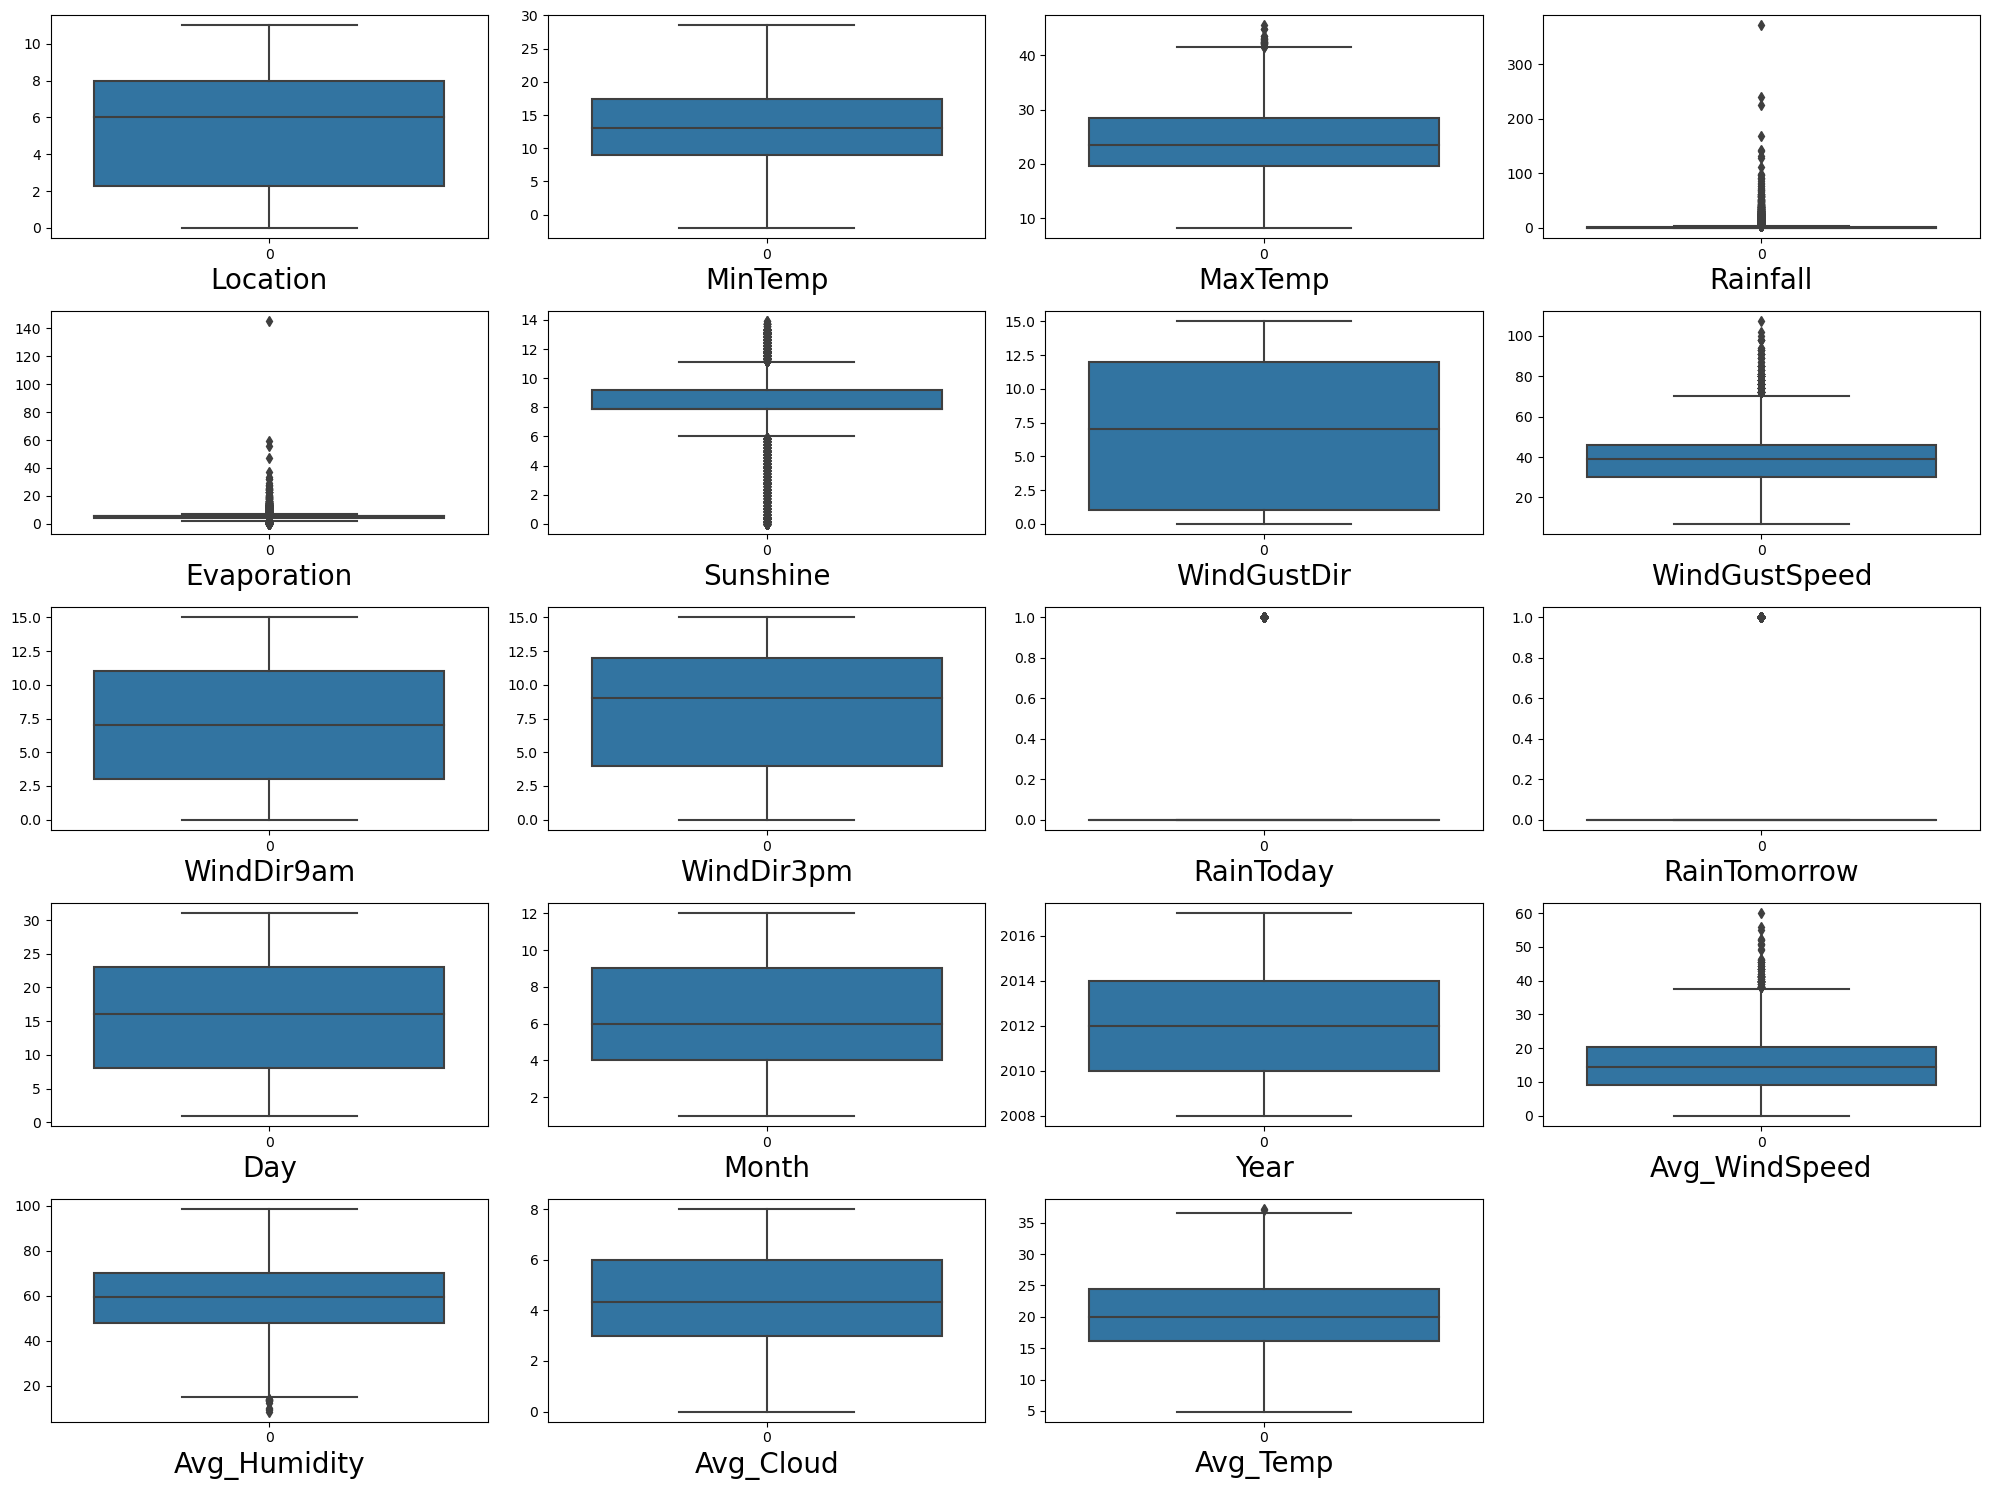

In [54]:
plt.figure(figsize=(20,15))
graph=1
for column in df:
    if graph<20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout()

In [55]:
from scipy.stats import zscore
out_features=df[['Rainfall','Evaporation','Sunshine','WindGustSpeed','Avg_WindSpeed']]
z=np.abs(zscore(out_features))
z

,Rainfall,Evaporation,Sunshine,WindGustSpeed,Avg_WindSpeed
0,0.207990,2.656460e-16,3.249310e-16,3.754887e-01,0.801378
1,0.265231,2.656460e-16,3.249310e-16,3.754887e-01,0.255644
2,0.265231,2.656460e-16,3.249310e-16,5.250161e-01,0.860101
3,0.265231,2.656460e-16,3.249310e-16,1.119786e+00,0.607985
4,0.169829,2.656460e-16,3.249310e-16,1.511975e-01,0.196921
...,...,...,...,...,...
8420,0.265231,2.656460e-16,3.249310e-16,5.964399e-01,0.373091
8421,0.265231,2.656460e-16,3.249310e-16,1.269314e+00,0.490538
8422,0.265231,2.656460e-16,3.249310e-16,1.478575e-01,0.725432
8423,0.265231,2.656460e-16,3.249310e-16,8.207311e-01,0.607985


In [56]:
#thresold=3
np.where(z>3)

(array([   8,   52,   62,  123,  267,  381,  431,  462,  563,  699,  713,
         770,  795,  796,  797,  802,  928,  935,  949,  979,  980,  980,
         980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1203, 1237, 1241,
        1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1661,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 2108, 2116, 2201, 2219,
        2231, 2265, 2281, 2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677,
        2735, 2827, 2835, 2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890,
        2891, 2897, 2898, 2900, 2900, 2901, 2905, 2909, 2911, 2919, 2925,
        2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003, 3042, 3045,
        3051, 3052, 3055, 3066, 3067, 3067, 3068, 3070, 3082, 3082, 3089,
        3089, 3099, 3099, 3101, 3101, 3143, 3150, 3153, 3157, 3157, 3164,
        3169, 3172, 3178, 3185, 3192, 3206, 3213, 3221, 3227, 3234, 3248,
        3248, 3256, 3260, 3350, 3360, 3419, 3421, 3430, 3449, 3449, 3450,
        3458, 3491, 3509, 3514, 3571, 

In [57]:
df1=df[(z<3).all(axis=1)]
df1.shape

(6520, 20)

In [58]:
print("old df",df.shape)
print("new df",df1.shape)

old df (6762, 20)
new df (6520, 20)


In [59]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 3.5788228334812184


# Skewness checking

In [60]:
df1.skew()

Location         0.003655
MinTemp         -0.074205
MaxTemp          0.311179
Rainfall         3.536049
Evaporation      0.746242
Sunshine        -0.885988
WindGustDir      0.107906
WindGustSpeed    0.489098
WindDir9am       0.222745
WindDir3pm      -0.127292
RainToday        1.340771
RainTomorrow     1.329043
Day              0.003161
Month            0.027129
Year             0.360435
Avg_WindSpeed    0.429803
Avg_Humidity    -0.163601
Avg_Cloud       -0.232662
Avg_Temp         0.118731
Avg_Pressure     0.104076
dtype: float64

In [61]:
df1['Rainfall']=np.cbrt(df1['Rainfall'])
df1['Evaporation']=np.cbrt(df1['Evaporation'])
df1['Sunshine']=np.cbrt(df1['Sunshine'])

# Seperating features and label

In [62]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [63]:
x.shape,y.shape

((6762, 19), (6762,))

# Feature scaling using standard scalarization

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,-1.395097,0.052498,-1.954990e-01,-0.207990,2.656460e-16,3.249310e-16,1.220923,3.754887e-01,1.315650,1.372365,-0.550355,-1.675969,1.639768,-1.761148,0.801378,-0.772994,0.854928,-0.169993,-1.510192
1,-1.395097,-1.030484,1.634110e-01,-0.265231,2.656460e-16,3.249310e-16,1.412005,3.754887e-01,-0.222688,1.595253,-0.550355,-1.562245,1.639768,-1.761148,-0.255644,-1.515849,0.000000,0.080050,-1.207248
2,-1.395097,-0.037750,2.612956e-01,-0.265231,2.656460e-16,3.249310e-16,1.603087,5.250161e-01,1.315650,1.595253,-0.550355,-1.448521,1.639768,-1.761148,0.860101,-1.546801,-0.541679,0.321162,-1.383965
3,-1.395097,-0.705589,6.365197e-01,-0.265231,2.656460e-16,3.249310e-16,-0.498814,-1.119786e+00,0.436600,-1.748064,-0.550355,-1.334798,1.639768,-1.761148,-0.607985,-1.763467,0.000000,0.356883,-0.197438
4,-1.395097,0.792536,1.338026e+00,-0.169829,2.656460e-16,3.249310e-16,1.220923,1.511975e-01,-1.321500,-0.187849,-0.550355,-1.221074,1.639768,-1.761148,-0.196921,-0.092043,1.480164,0.615856,-1.341890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1.186193,-1.860770,-1.139286e-01,-0.265231,2.656460e-16,3.249310e-16,-1.263141,-5.964399e-01,0.436600,-1.525176,-0.550355,0.598504,-0.136841,2.150387,-0.373091,-1.330135,0.000000,-0.723660,1.022750
6758,1.186193,-1.716373,1.960392e-01,-0.265231,2.656460e-16,3.249310e-16,-0.116650,-1.269314e+00,0.436600,-1.079401,-0.550355,0.712227,-0.136841,2.150387,-0.490538,-1.268231,0.000000,-0.464687,0.829203
6759,1.186193,-1.391478,4.570647e-01,-0.265231,2.656460e-16,3.249310e-16,-0.689895,-1.478575e-01,0.436600,1.372365,-0.550355,0.825951,-0.136841,2.150387,-0.725432,-1.268231,0.000000,-0.178923,0.425279
6760,1.186193,-0.958285,4.733788e-01,-0.265231,2.656460e-16,3.249310e-16,0.456596,-8.207311e-01,0.656363,-1.079401,-0.550355,0.939675,-0.136841,2.150387,-0.607985,-1.330135,-0.853667,0.044329,0.265392


# Variance inflation factor

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.609491,Location
1,7.583631,MinTemp
2,18.154881,MaxTemp
3,1.307057,Rainfall
4,1.246984,Evaporation
5,1.856735,Sunshine
6,1.518604,WindGustDir
7,2.321260,WindGustSpeed
8,1.291872,WindDir9am
9,1.337609,WindDir3pm


As we have seen in the correlation matrix, The column Max_Temp and Avg_Temp are having strong correlation between them. Therefore we reed to remove one column in order to reduce mulitcollinearity.

In [66]:
x = x.drop(['Avg_Temp'], axis=1)

x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Pressure
0,-1.395097,0.052498,-0.195499,-0.207990,2.656460e-16,3.249310e-16,1.220923,0.375489,1.315650,1.372365,-0.550355,-1.675969,1.639768,-1.761148,0.801378,-0.772994,0.854928,-1.510192
1,-1.395097,-1.030484,0.163411,-0.265231,2.656460e-16,3.249310e-16,1.412005,0.375489,-0.222688,1.595253,-0.550355,-1.562245,1.639768,-1.761148,-0.255644,-1.515849,0.000000,-1.207248
2,-1.395097,-0.037750,0.261296,-0.265231,2.656460e-16,3.249310e-16,1.603087,0.525016,1.315650,1.595253,-0.550355,-1.448521,1.639768,-1.761148,0.860101,-1.546801,-0.541679,-1.383965
3,-1.395097,-0.705589,0.636520,-0.265231,2.656460e-16,3.249310e-16,-0.498814,-1.119786,0.436600,-1.748064,-0.550355,-1.334798,1.639768,-1.761148,-0.607985,-1.763467,0.000000,-0.197438
4,-1.395097,0.792536,1.338026,-0.169829,2.656460e-16,3.249310e-16,1.220923,0.151197,-1.321500,-0.187849,-0.550355,-1.221074,1.639768,-1.761148,-0.196921,-0.092043,1.480164,-1.341890


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.606310,Location
1,3.934396,MinTemp
2,4.902593,MaxTemp
3,1.304482,Rainfall
4,1.245652,Evaporation
5,1.847326,Sunshine
6,1.518342,WindGustDir
7,2.274205,WindGustSpeed
8,1.291845,WindDir9am
9,1.335399,WindDir3pm


# Model Building

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Finding best random state

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.8299655002464268 at random state 1
Best accuracy is 0.8339083292262198 at random state 2
Best accuracy is 0.8432725480532282 at random state 9
Best accuracy is 0.8551010349926071 at random state 11
Best accuracy is 0.8560867422375554 at random state 190


# Classification algorithms

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [72]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Random Forest classification

In [73]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8551010349926071
[[1509   81]
 [ 213  226]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1590
           1       0.74      0.51      0.61       439

    accuracy                           0.86      2029
   macro avg       0.81      0.73      0.76      2029
weighted avg       0.85      0.86      0.85      2029



# ExtraTreesClassifier

In [74]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8526367668802366
[[1509   81]
 [ 218  221]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1590
           1       0.73      0.50      0.60       439

    accuracy                           0.85      2029
   macro avg       0.80      0.73      0.75      2029
weighted avg       0.84      0.85      0.84      2029



# logisticRegression

In [75]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8477082306554953
[[1495   95]
 [ 214  225]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1590
           1       0.70      0.51      0.59       439

    accuracy                           0.85      2029
   macro avg       0.79      0.73      0.75      2029
weighted avg       0.84      0.85      0.84      2029



# SVC

In [76]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8477082306554953
[[1511   79]
 [ 230  209]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1590
           1       0.73      0.48      0.57       439

    accuracy                           0.85      2029
   macro avg       0.80      0.71      0.74      2029
weighted avg       0.84      0.85      0.84      2029



# AdaBoostClassifier

In [77]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(accuracy_score(y_test,predada))
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

0.8368654509610646
[[1485  105]
 [ 226  213]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1590
           1       0.67      0.49      0.56       439

    accuracy                           0.84      2029
   macro avg       0.77      0.71      0.73      2029
weighted avg       0.83      0.84      0.83      2029



# Decision Tree

In [78]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.7816658452439625
[[1349  241]
 [ 202  237]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1590
           1       0.50      0.54      0.52       439

    accuracy                           0.78      2029
   macro avg       0.68      0.69      0.69      2029
weighted avg       0.79      0.78      0.78      2029



# Cross Validation

In [79]:
#cross validation for RandomForest Clasifier
score=cross_val_score(RFC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predRFC)-score.mean())

score
0.7805328505140887
Diff between acc_score and cross validation- 0.07456818447851843


In [80]:
#cross validation for Extratree classifier
score1=cross_val_score(ET,x,y)
print("score1")
print(score1.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predET)-score1.mean())

score1
0.7823075611068105
Diff between acc_score and cross validation- 0.07032920577342605


In [81]:
#cross validarion for logistic regreesion
score2=cross_val_score(LR,x,y)
print("score2")
print(score2.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predLR)-score2.mean())

score2
0.8206143918620465
Diff between acc_score and cross validation- 0.027093838793448732


In [82]:
#cross validation for Ada boosting
score3=cross_val_score(ada,x,y)
print("score3")
print(score3.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predada)-score3.mean())

score3
0.778756390576278
Diff between acc_score and cross validation- 0.05810906038478658


In [83]:
#cross validation for decision trees
score4=cross_val_score(DT,x,y)
print("score4")
print(score4.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predDT)-score4.mean())

score4
0.6805714454401133
Diff between acc_score and cross validation- 0.10109439980384927


In [84]:
#cross validation for SVM
score6=cross_val_score(svc,x,y)
print("score6")
print(score6.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predsvc)-score6.mean())

score6
0.7972452188212038
Diff between acc_score and cross validation- 0.05046301183429147


# Hyper parameter tuning

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [86]:
clf.best_params_

{'C': 0.1}

In [87]:
Final_model=LogisticRegression(C=10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.82010842779695


Lets check auc for best model hyper parameter tuning

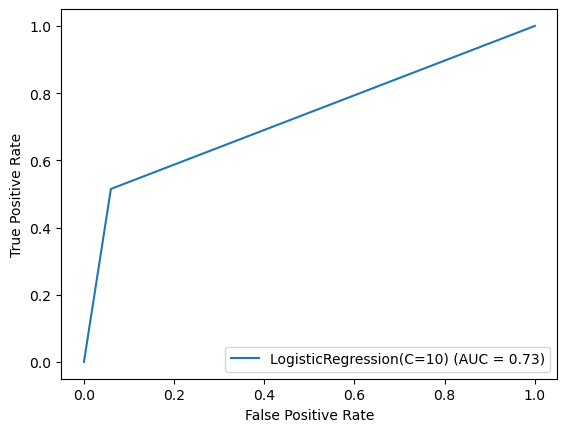

In [88]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [89]:
import joblib
joblib.dump(Final_model,"Weather forecast.pkl")

['Weather forecast.pkl']

In [90]:
model=joblib.load("Weather forecast.pkl")
prediction=model.predict(x_test)

In [91]:
a=np.array(y_test)
df=pd.DataFrame()
df["prediction"]=prediction
df["original"]=a
df

,prediction,original
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2024,0,0
2025,0,0
2026,0,0
2027,0,0


# Prediction for Rainfall

In [92]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.843433,1.743776,1.990866,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.160494,19.35,1007.40
1,1,7.4,25.1,0.000000,1.743776,1.990866,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.328897,20.75,1009.20
2,1,12.9,25.7,0.000000,1.743776,1.990866,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.168403,22.10,1008.15
3,1,9.2,28.0,0.000000,1.743776,1.990866,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.328897,22.30,1015.20
4,1,17.5,32.3,1.000000,1.743776,1.990866,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


In [93]:
x= df1.drop(['Rainfall'], axis=1)
y1 =df1['Rainfall']

print(x.shape)
print(y1.shape)

(6520, 19)
(6520,)


In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,-1.390538,0.066738,-0.194415,0.225208,0.139013,1.223843,0.459843,1.325698,1.374161,-0.5336,-0.536209,-1.676908,1.650814,-1.766584,0.890498,-0.771701,0.874102,-0.165807,-1.554818
1,-1.390538,-1.012607,0.165058,0.225208,0.139013,1.414853,0.459843,-0.216181,1.597524,-0.5336,-0.536209,-1.563124,1.650814,-1.766584,-0.225028,-1.520684,0.017462,0.083961,-1.247436
2,-1.390538,-0.023207,0.263096,0.225208,0.139013,1.605864,0.620631,1.325698,1.597524,-0.5336,-0.536209,-1.449341,1.650814,-1.766584,0.952471,-1.551892,-0.525302,0.324808,-1.426742
3,-1.390538,-0.688803,0.638909,0.225208,0.139013,-0.495250,-1.148039,0.444624,-1.752918,-0.5336,-0.536209,-1.335558,1.650814,-1.766584,-0.596869,-1.770345,0.017462,0.360489,-0.222831
4,-1.390538,0.804291,1.341516,0.225208,0.139013,1.223843,0.218660,-1.317522,-0.189379,-0.5336,-0.536209,-1.221774,1.650814,-1.766584,-0.163054,-0.085133,1.500590,0.619177,-1.384050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,1.203634,-1.840105,-0.112716,0.225208,0.139013,-1.259291,-0.585281,0.444624,-1.529555,-0.5336,-0.536209,0.598758,-0.135380,2.171986,-0.348975,-1.333438,0.017462,-0.718863,1.015234
6516,1.203634,-1.696192,0.197738,0.225208,0.139013,-0.113229,-1.308827,0.444624,-1.082830,-0.5336,-0.536209,0.712542,-0.135380,2.171986,-0.472922,-1.271023,0.017462,-0.460175,0.818851
6517,1.203634,-1.372389,0.459173,0.225208,0.139013,-0.686260,-0.102916,0.444624,1.374161,-0.5336,-0.536209,0.826325,-0.135380,2.171986,-0.720817,-1.271023,0.017462,-0.174727,0.409009
6518,1.203634,-0.940651,0.475512,0.225208,0.139013,0.459802,-0.826463,0.664893,-1.082830,-0.5336,-0.536209,0.940108,-0.135380,2.171986,-0.596869,-1.333438,-0.837915,0.048280,0.246780


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.623238,Location
1,7.786364,MinTemp
2,18.104731,MaxTemp
3,1.464572,Evaporation
4,1.587435,Sunshine
5,1.544158,WindGustDir
6,2.345042,WindGustSpeed
7,1.291195,WindDir9am
8,1.342691,WindDir3pm
9,1.337119,RainToday


In [96]:
x = x.drop(['Avg_Temp'], axis=1)

x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Pressure
0,-1.390538,0.066738,-0.194415,0.225208,0.139013,1.223843,0.459843,1.325698,1.374161,-0.5336,-0.536209,-1.676908,1.650814,-1.766584,0.890498,-0.771701,0.874102,-1.554818
1,-1.390538,-1.012607,0.165058,0.225208,0.139013,1.414853,0.459843,-0.216181,1.597524,-0.5336,-0.536209,-1.563124,1.650814,-1.766584,-0.225028,-1.520684,0.017462,-1.247436
2,-1.390538,-0.023207,0.263096,0.225208,0.139013,1.605864,0.620631,1.325698,1.597524,-0.5336,-0.536209,-1.449341,1.650814,-1.766584,0.952471,-1.551892,-0.525302,-1.426742
3,-1.390538,-0.688803,0.638909,0.225208,0.139013,-0.495250,-1.148039,0.444624,-1.752918,-0.5336,-0.536209,-1.335558,1.650814,-1.766584,-0.596869,-1.770345,0.017462,-0.222831
4,-1.390538,0.804291,1.341516,0.225208,0.139013,1.223843,0.218660,-1.317522,-0.189379,-0.5336,-0.536209,-1.221774,1.650814,-1.766584,-0.163054,-0.085133,1.500590,-1.384050


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Finding best random state

In [98]:
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y1_train)
    pred=lr.predict(x_test)
    acc=r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best r2_score is",maxAccu,"at random state",maxRS)

Best r2_score is 0.7781738348073228 at random state 0
Best r2_score is 0.7862013865454143 at random state 1
Best r2_score is 0.7940986065584826 at random state 4
Best r2_score is 0.8001510317809228 at random state 5
Best r2_score is 0.8011587211694404 at random state 21
Best r2_score is 0.8024927174495143 at random state 40


In [99]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

# 1.Linear Regression

In [101]:
lr = LinearRegression()
lr.fit(x_train, y1_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_score:',r2_score(y1_test,pred_lr))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_lr))
print("mean squared error:",mean_squared_error(y1_test,pred_lr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_lr)))

LinearRegression()
R2_score: 0.8024927174495143
R2_score on training data: 77.98388525934261
Mean absolute error: 0.25092228065537203
mean squared error: 0.12578812155880728
Root mean squared error: 0.3546662114704575


# 2.Random Forest regression

In [102]:
RFR= RandomForestRegressor()
RFR.fit(x_train, y1_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y1_test,pred_RFR))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_RFR))
print("mean squared error:",mean_squared_error(y1_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_RFR)))


RandomForestRegressor()
R2_score: 0.805620027966232
R2_score on training data: 97.06762319282728
Mean absolute error: 0.24626598144466008
mean squared error: 0.12379640504917194
Root mean squared error: 0.35184713306942256


# Decision Tree

In [103]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y1_train)
pred_dt=dt.predict(x_test)
pred_train=lr.predict(x_train)
print(dt)
print('R2_score:',r2_score(y1_test,pred_dt))
print("R2_score on training data:",r2_score(y1_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y1_test,pred_dt))
print("mean squared error:",mean_squared_error(y1_test,pred_dt))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred_dt)))


DecisionTreeRegressor()
R2_score: 0.6111257974520816
R2_score on training data: 77.98388525934261
Mean absolute error: 0.27946008227329777
mean squared error: 0.24766557885620358
Root mean squared error: 0.497660103741704


# Cross validation

In [104]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(lr,x,y1,cv=5,scoring='r2')
print("score1")
print(score1.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_lr)-score1.mean())*100)

score1
0.7818428105747804
Diff between r2_score and cross validation- 2.064990687473389


In [105]:
#cross validation of Random Forest
score=cross_val_score(RFR,x,y1,cv=5,scoring='r2')
print("score")
print(score.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_RFR)-score.mean())*100)

score
0.771222127347278
Diff between r2_score and cross validation- 3.439790061895398


In [106]:
score5=cross_val_score(dt,x,y1,cv=5,scoring='r2')
print("score5")
print(score5.mean())
print("Diff between r2_score and cross validation-",(r2_score(y1_test,pred_dt)-score5.mean())*100)

score5
0.5395638731381581
Diff between r2_score and cross validation- 7.15619243139235


# Hyper Parameter Tuning

In [107]:
from sklearn.model_selection import RandomizedSearchCV
params= {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}
             

In [108]:
random=RandomizedSearchCV(LinearRegression(),params,cv=5)
random.fit(x_train,y1_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [109]:
random.best_params_

{'positive': False, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': False}

In [111]:
Final_model=LinearRegression(positive=False,n_jobs=10,fit_intercept=True,copy_X=False)
Final_model.fit(x_train,y1_train)
pred=Final_model.predict(x_test)

print('r2_score:',r2_score(y1_test,pred)*100)



r2_score: 80.1659978646463


In [112]:
import joblib
import pickle
fname="Rainfall weather forecast.pkl"

In [113]:
pickle.dump(Final_model,open(fname,'wb'))

In [114]:
loaded_model=pickle.load(open('Rainfall weather forecast.pkl','rb'))
result=loaded_model.score(x_test,y1_test)
print(result*100)

80.1659978646463
